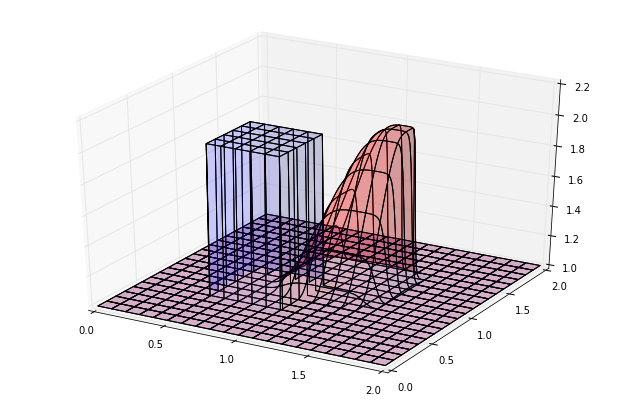

In [21]:
import numpy as np
from matplotlib import pyplot as plt
import time, sys
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
def run(n, NT, sigma, color):
    y, dy = x, dx = np.linspace(0,2,n, retstep=True)
    X, Y = np.meshgrid(x,y)
    dt = dx*sigma
    u = np.ones((n,n))
    u[(.5 <= X) * (X <= 1) * (.5 <= Y) * (Y <= 1)] = 2
    v = np.ones((n,n))
    v[(.5 <= X) * (X <= 1) * (.5 <= Y) * (Y <= 1)] = 2
    
    fig = plt.figure(figsize=(11,7), dpi=100)
    ax = fig.gca(projection='3d')
    surf = ax.plot_surface(X,Y,u, color=(0,0,1,0.1))
    
    for t in range(NT):
        u_back_x = u[:-1,1:]#np.roll(u, -1, axis=0)
        u_back_y = u[1:,:-1]#np.roll(u, -1, axis=1)
        u_center = u[1:,1:]
        v_back_x = v[:-1,1:]#np.roll(u, -1, axis=0)
        v_back_y = v[1:,:-1]#np.roll(u, -1, axis=1)
        v_center = v[1:,1:]
        
        un = u.copy()
        vn = v.copy()
                           
        un[1:,1:] = u_center - u_center*dt/dx*(u_center - u_back_x) - v_center*dt/dy*\
                (u_center-u_back_y) 
        
                           
        vn[1:,1:] = v_center - u_center*dt/dx*(v_center - v_back_x) - v_center*dt/dy*\
                (v_center-v_back_y)     
          
        u = un
        v = vn
    surf2 = ax.plot_surface(X,Y,u, color=[1,0,0,0.2])
#     surf3 = ax.plot_surface(X,Y,v, color=[0,0,1,0.2])
run(201,160, .2, "b")